In [1]:
from sklearn.decomposition import DictionaryLearning
from sklearn.linear_model import OrthogonalMatchingPursuitCV as OMP
import numpy as np
import matplotlib.pyplot as plt

### 地震数据输入

In [2]:
#地震数据输入
seismic_data = np.load('seismic_data.npy')

In [3]:
seismic_data.shape

(1000, 64)

### 字典学习

In [4]:
#字典学习，原子数6
dict_learner = DictionaryLearning(
        n_components=6, transform_alpha=0.1,
        random_state=42, 
)
dict_learner = dict_learner.fit(seismic_data)

In [5]:
X = dict_learner.components_.T
X.shape

(64, 6)

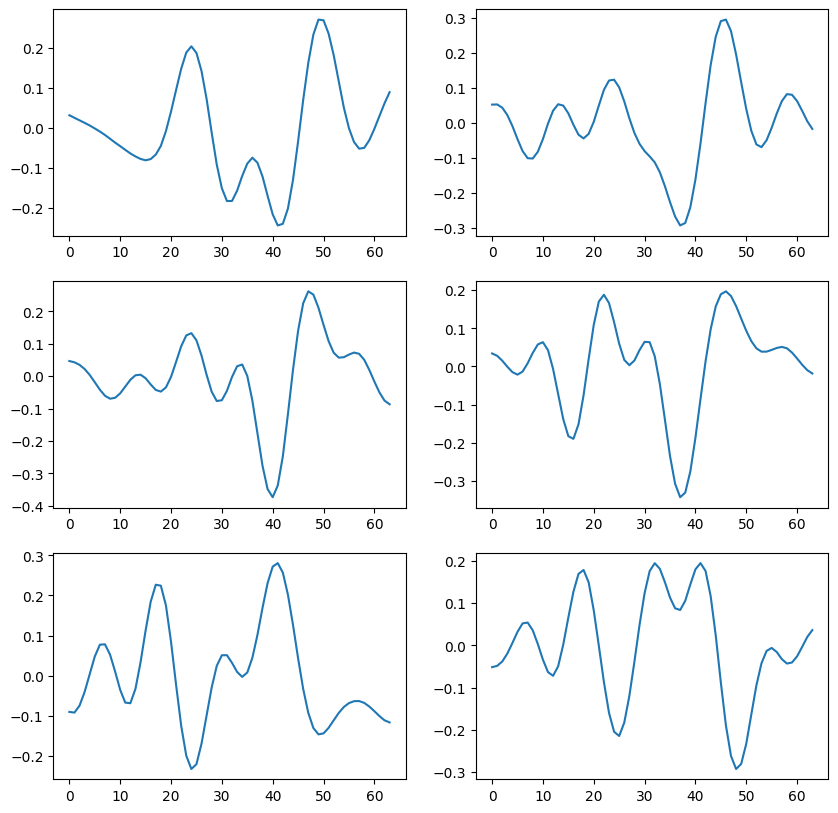

In [6]:
fig=plt.figure(figsize=(10,10)) 
for i in range(6):
    plt.subplot(3, 2, i+1)
    plt.plot(X[:,i])

In [7]:
#OMP一次迭代：max_iter=1，并重建信号
seismic_data_sub = seismic_data[0:len(seismic_data):125,:]
print(seismic_data_sub.shape)
data_OMP = np.zeros_like(seismic_data_sub)
for i in range(seismic_data_sub.shape[0]):
    omp = OMP(normalize=False, max_iter=1).fit(X, seismic_data_sub[i, :])
    print(omp.coef_)
    data_OMP[i,:]=np.dot(X, omp.coef_)

(8, 64)
[0.         5.31682585 0.         0.         0.         0.        ]
[ 0.          0.          0.          0.          0.         -5.89058664]
[ 0.          0.          0.          0.         -5.79351337  0.        ]
[0.         0.         0.         7.47181094 0.         0.        ]
[0.         0.         6.61105824 0.         0.         0.        ]
[ 0.          0.          0.          0.         -6.23704563  0.        ]
[ 0.          0.          0.          0.          0.         -6.99350225]
[0.         5.40466184 0.         0.         0.         0.        ]


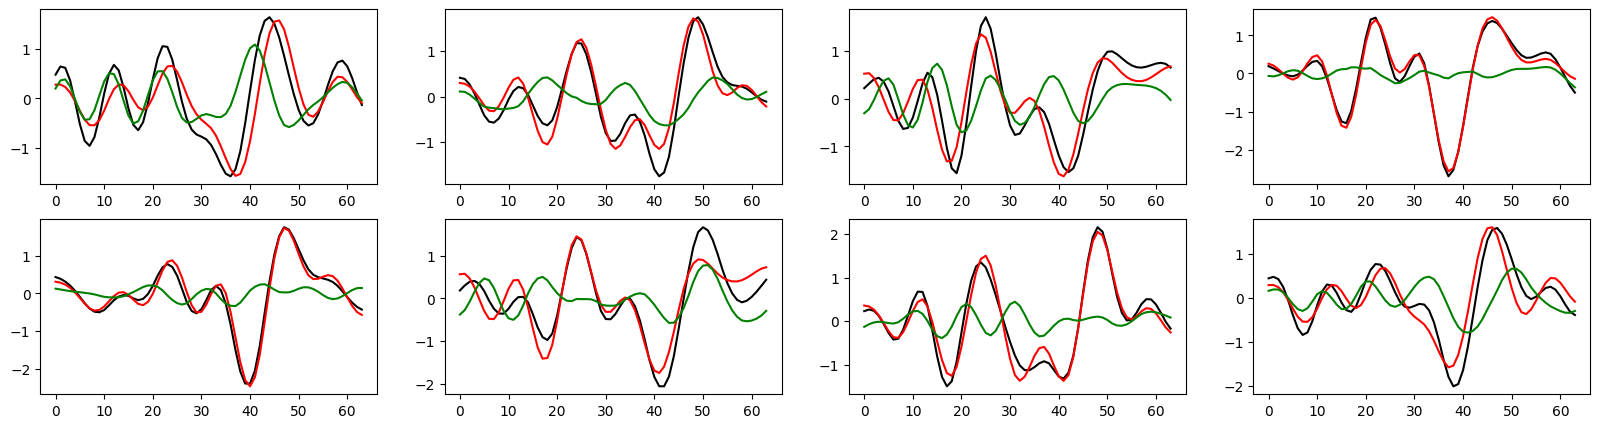

In [8]:
fig=plt.figure(figsize=(20,5)) 
for i in range(8):
        plt.subplot(2, 4, i+1)
        plt.plot(seismic_data_sub[i, :], color='k')
        plt.plot(data_OMP[i,:], color='r')
        plt.plot(seismic_data_sub[i, :]-data_OMP[i,:], color='g')

In [9]:
#OMP三次迭代：max_iter=3，并重建信号
seismic_data_sub = seismic_data[0:len(seismic_data):125,:]
print(seismic_data_sub.shape)
data_OMP = np.zeros_like(seismic_data_sub)
for i in range(seismic_data_sub.shape[0]):
    omp = OMP(normalize=False, max_iter=3).fit(X, seismic_data_sub[i, :])
    print(omp.coef_)
    data_OMP[i,:]=np.dot(X, omp.coef_)

(8, 64)
[ 0.          7.42835885 -4.0447179   0.         -1.25516173  0.        ]
[ 0.         -1.5209691   2.56065503  0.          0.         -4.90463678]
[ 0.          0.          0.         -1.9942415  -6.80724201  0.        ]
[0.         0.         0.         7.47181094 0.         0.        ]
[0.         0.         6.05509699 0.85833983 0.         0.        ]
[ 3.6578372  -1.29098278  0.          0.         -3.88023417  0.        ]
[ 0.          0.          0.          1.4097682   0.         -6.18299322]
[0.         2.70555738 2.70754764 1.25366037 0.         0.        ]


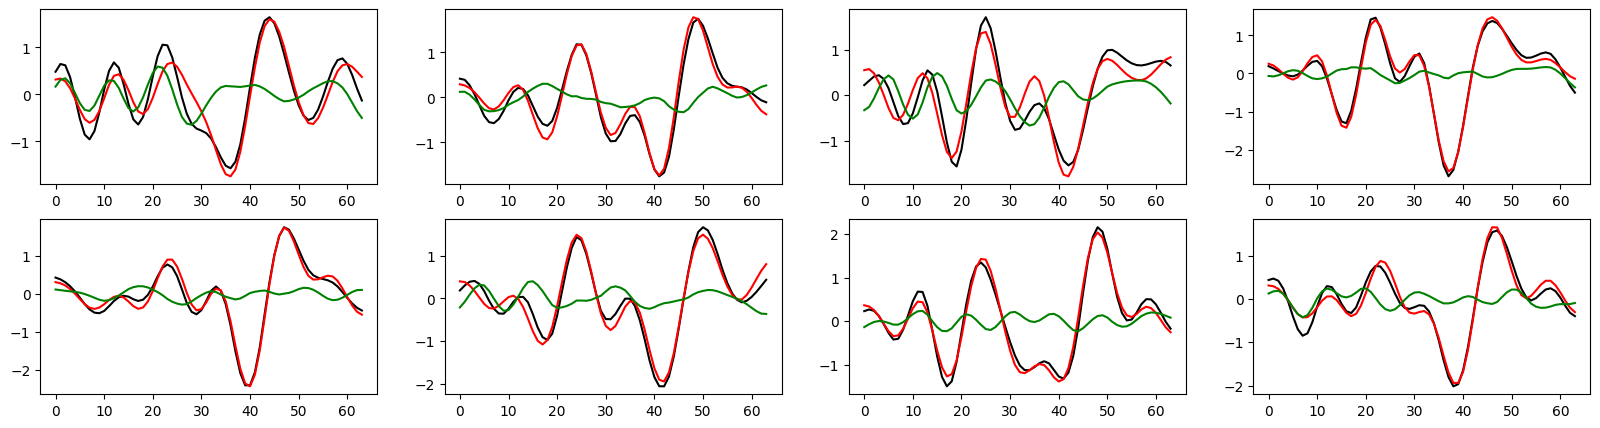

In [10]:
fig=plt.figure(figsize=(20,5)) 
for i in range(8):
        plt.subplot(2, 4, i+1)
        plt.plot(seismic_data_sub[i, :], color='k')
        plt.plot(data_OMP[i,:], color='r')
        plt.plot(seismic_data_sub[i, :]-data_OMP[i,:], color='g')